# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [56]:
# Import your libraries
import pandas as pd 
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import pylab

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [7]:
# Your code here
mean = 50
standard_deviation = 5
sample_size = [10]

random_samples_10 = np.random.normal(loc= mean, scale = standard_deviation, size = sample_size)


In [8]:
random_samples_10

array([48.58444858, 47.21042391, 57.75749139, 54.64933152, 56.61719818,
       44.80625619, 48.71581886, 43.2047876 , 49.49078221, 55.58235344])

In [29]:
mean = 50
standard_deviation = 5
sample_size = [50]

random_samples_50 = np.random.normal(loc= mean, scale = standard_deviation, size = sample_size)


In [30]:
mean = 50
standard_deviation = 5
sample_size = [500]

random_samples_500 = np.random.normal(loc= mean, scale = standard_deviation, size = sample_size)


In [31]:
mean = 50
standard_deviation = 5
sample_size = [5000]

random_samples_5000 = np.random.normal(loc= mean, scale = standard_deviation, size = sample_size)


In [37]:
random_samples_500.shape

(500,)

In [32]:
stats.normaltest(random_samples_10)

/home/atwenter/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=1.892230228178098, pvalue=0.3882463904038406)

In [33]:
stats.normaltest(random_samples_50)

NormaltestResult(statistic=2.5500505048436697, pvalue=0.27942391200181776)

In [34]:
stats.normaltest(random_samples_500)

NormaltestResult(statistic=3.9313099467367403, pvalue=0.1400641182988442)

In [35]:
stats.normaltest(random_samples_5000)

NormaltestResult(statistic=0.45718396601685235, pvalue=0.7956531072719507)

#### Interpret the normaltest results and make your observations.

# Explain the test results here
- The statistic parameter give you information regarding the skewness and the kurtosis of the values. return s(z-scored)² + k(z-scored)².That is, this value goes from 0 to ?. The greater it is, the less normal is the distribution.

- p-value returns the probability for the hypothesis of this test (null hypothesis: the distribution is normal). That means, the greater the p-value, the more normal is the distribution. 

As a conclusion, the more random values you get, the more normal distribution follow.

#### Step 2: Plot normal distributions

Use matplotlib to plot a histogram of each sample. 

*Hints:*

- Your outputs should look like below:

![normal distributions with different sample sizes](ch-1.png)

(array([1., 1., 1., 2., 1., 0., 0., 1., 1., 2.]),
 array([43.2047876 , 44.66005798, 46.11532836, 47.57059874, 49.02586912,
        50.4811395 , 51.93640987, 53.39168025, 54.84695063, 56.30222101,
        57.75749139]),
 <a list of 10 Patch objects>)

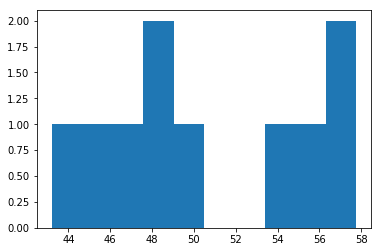

In [45]:
# Your code here
plt.hist(random_samples_10)

(array([3., 2., 5., 4., 5., 9., 6., 7., 4., 5.]),
 array([41.2451225 , 42.89582087, 44.54651923, 46.1972176 , 47.84791596,
        49.49861433, 51.14931269, 52.80001106, 54.45070942, 56.10140779,
        57.75210615]),
 <a list of 10 Patch objects>)

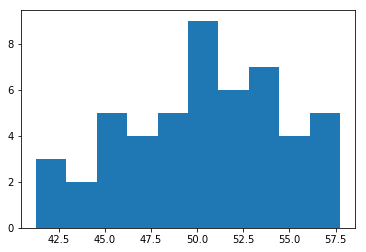

In [46]:
plt.hist(random_samples_50)

(array([ 1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         1.,  0.,  2.,  0.,  0.,  1.,  0.,  0.,  0.,  2.,  1.,  2.,  1.,
         1.,  1.,  1.,  0.,  0.,  2.,  1.,  0.,  0.,  2.,  0.,  0.,  0.,
         3.,  1.,  0.,  1.,  1.,  2.,  1.,  0.,  2.,  3.,  2.,  1.,  2.,
         2.,  1.,  1.,  1.,  5.,  1.,  1.,  2.,  4.,  2.,  3.,  2.,  3.,
         4.,  4.,  5.,  3.,  5.,  7.,  3.,  6.,  2.,  4.,  7.,  7.,  6.,
         4.,  2.,  5.,  3.,  4.,  3.,  4.,  1.,  5.,  2.,  5.,  2., 11.,
         4.,  8.,  4.,  5.,  3.,  7.,  5.,  5.,  3.,  4.,  5.,  5.,  5.,
         3.,  3., 11.,  4.,  8.,  3.,  7.,  5.,  5.,  9.,  7.,  6.,  3.,
         8.,  4.,  7.,  4.,  5.,  7.,  7.,  6.,  7.,  4.,  8.,  5.,  1.,
         8.,  7.,  5.,  7.,  1.,  3.,  2.,  3.,  1.,  2.,  5.,  2.,  1.,
         3.,  4.,  2.,  1.,  4.,  5.,  0.,  8.,  2.,  2.,  2.,  1.,  0.,
         0.,  2.,  1.,  2.,  2.,  1.,  3.,  0.,  0.,  0.,  3.,  2.,  0.,
         1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.

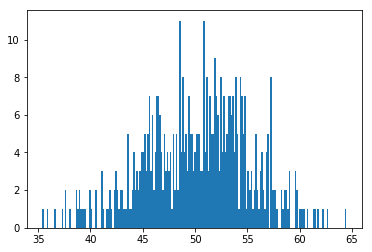

In [51]:
plt.hist(random_samples_500, bins= 200)

(array([1., 0., 0., ..., 0., 0., 1.]),
 array([32.85270954, 32.86986339, 32.88701724, ..., 67.12609754,
        67.14325138, 67.16040523]),
 <a list of 2000 Patch objects>)

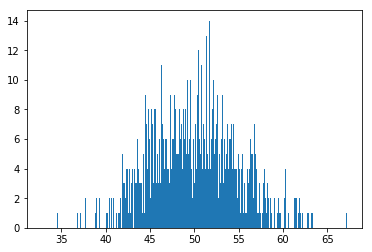

In [50]:
plt.hist(random_samples_5000, bins=2000)

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

# Your comment and explanation here
The CLT allow us to know that if enough independent, equally distributed samples with std dev finite, the mean of that samples follow a normal distribution. In this case, the random values generated tend to follow a normal distribution as they are independent, equally distributed and with std dev finite. 

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

In [70]:
# Your code here
binomial:

yes/no
success each time = 0.15
5 times

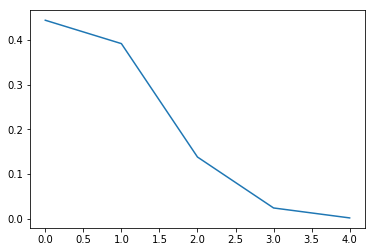

In [78]:
x = scipy.linspace(0, 4, 5)
pmf = scipy.stats.binom.pmf(x,5, 0.15)
pylab.plot(pmf)

#### Explain what you observe from the plot above

The plot represents the probability (y-axis) that how many people (x-axis) from a pool of 5, will look the ad from you tube, knowing that each person has a probability of 0.15 to look at it. 
In the plot, we can see that the most probable is that nobody will look the add, and the probability decreases as we increase the number of people that would look the add. 

#### Now plot PMP with 50, 500, and 5000 visitors.

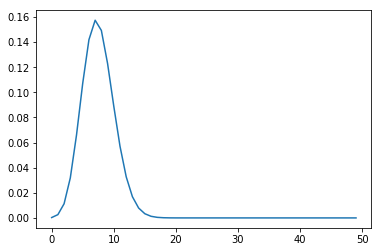

In [73]:
# Your code here
x = scipy.linspace(0, 49, 50)
pmf = scipy.stats.binom.pmf(x,50, 0.15)
pylab.plot(pmf)

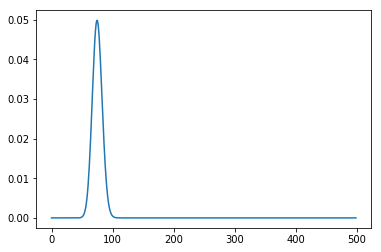

In [76]:
x = scipy.linspace(0, 499, 500)
pmf = scipy.stats.binom.pmf(x,500, 0.15)
pylab.plot(pmf)

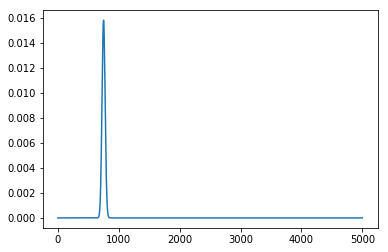

In [75]:
x = scipy.linspace(0, 4999, 5000)
pmf = scipy.stats.binom.pmf(x,5000, 0.15)
pylab.plot(pmf)

#### What did you notice from the distribution plots? Comment your findings.

As the people we are evaluating increases, the probability that at least someone will see the add increases, until the point that the most probable thing will be that 15% of the sample will look one ad. 

# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

Probability of one event happens in an interval of time.

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [81]:
# Your code here
stats.poisson.pmf(320, 300)

0.011612348610402475

#### What is the probability of getting 60 visits?

In [82]:
# Your code here
stats.poisson.pmf(60, 300)

2.622743762294515e-64

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

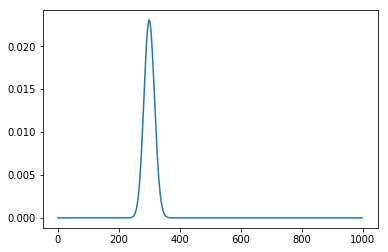

In [84]:
# your code here
y = scipy.linspace(0, 999, 1000)
pmf_poisson = scipy.stats.poisson.pmf(y, 300)
pylab.plot(pmf_poisson)

# Challenge 4 - Central Limit Theorem

#### Example of application

A delivery company needs 35 minutes to deliver a package, with a standard deviation of 8 minutes. Suppose that in one day, they deliver 200 packages.

#### a. What is the probability that the mean delivery time today is between 30 and 35 minutes?

In [ ]:
# Your answer here
x_mean= 35
std_pack = 8
std_div_sq_n = 0.5656
n = 200

P = mean delivery time between 30 and 35 is 0.5

#### b. What is the probablity that in total, it takes more than 115 hours to deliver all 200 packages?

In [ ]:
# Your answer here
min = 115 * 60= 6900
y value

n*mean = 200 * 35 = 7000
std*sq(n) = 113.1368

P of 6900 or less = 0.188
So, for more than 6900 = 0.812